<a href="https://colab.research.google.com/github/shyang0419/test/blob/master/cht_python_for_data_visualization_20220711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CK39HP001 Python資料視覺化專題 第001期

郭耀仁 <https://linktr.ee/yaojenkuo>

筆記本連結：<https://bit.ly/cht-pyviz>

## 2022-07-11

講義連結：

- [起步走](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/00-getting-started/lecture.slides.html)
- [進階資料框操作](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/01-advanced-dataframe-manipulations/lecture.slides.html)
- [資料科學模組 Matplotlib 入門](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/02-matplotlib/lecture.slides.html)

若想用 PDF 格式儲存，可以在網址後方加入 `?print-pdf` 就可以另存為 PDF 文件：

- [起步走](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/00-getting-started/lecture.slides.html?print-pdf)
- [進階資料框操作](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/01-advanced-dataframe-manipulations/lecture.slides.html?print-pdf)
- [資料科學模組 Matplotlib 入門](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/02-matplotlib/lecture.slides.html?print-pdf)

### 起步走

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 10000
random_ndarray = np.random.random(size=m)
normal_ndarray = np.random.normal(size=m)
uniform_ndarray = np.random.uniform(size=m)
randint_ndarray = np.random.randint(1, 7, size=m)
print(random_ndarray)
print(normal_ndarray)
print(uniform_ndarray)
print(randint_ndarray)

[0.98826781 0.63338824 0.85481802 ... 0.11005671 0.63554981 0.50197325]
[-0.59219341  0.09272829  1.38144199 ... -1.13004138  0.11762191
 -1.41791373]
[0.197159   0.01339385 0.47140303 ... 0.62093005 0.50704414 0.29384733]
[2 6 3 ... 4 6 4]


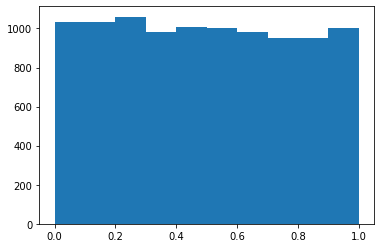

In [ ]:
fig, ax = plt.subplots()
ax.hist(random_ndarray, bins=10)
plt.show()

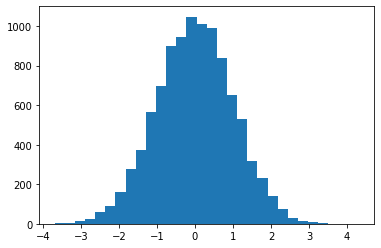

In [ ]:
fig, ax = plt.subplots()
ax.hist(normal_ndarray, bins=30) # bell-shaped
plt.show()

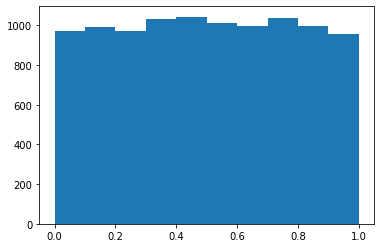

In [ ]:
fig, ax = plt.subplots()
ax.hist(uniform_ndarray, bins=10)
plt.show()

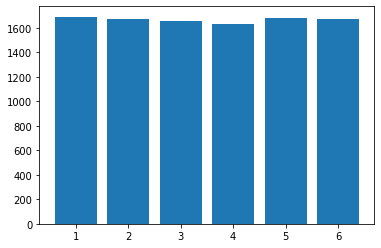

In [ ]:
unique_values, unique_counts = np.unique(randint_ndarray, return_counts=True)
fig, ax = plt.subplots()
ax.bar(unique_values, unique_counts)
plt.show()

### 進階資料框操作

In [ ]:
import pandas as pd

movies = pd.read_csv("https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/data/internet-movie-database/movies.csv")
print(movies.dtypes)
print(movies.shape)

id                int64
title            object
release_year      int64
rating          float64
director         object
runtime           int64
dtype: object
(250, 6)


In [ ]:
for column_label, column_series in movies.iteritems():
    print(column_series.min())

1
12 Angry Men
1921
8.1
Aamir Khan
45


In [ ]:
for row_index, row_series in movies.iterrows():
    print(f"""{row_series["title"]} is directed by {row_series["director"]}.""")

The Shawshank Redemption is directed by Frank Darabont.
The Godfather is directed by Francis Ford Coppola.
The Godfather: Part II is directed by Francis Ford Coppola.
The Dark Knight is directed by Christopher Nolan.
12 Angry Men is directed by Sidney Lumet.
Schindler's List is directed by Steven Spielberg.
The Lord of the Rings: The Return of the King is directed by Peter Jackson.
Pulp Fiction is directed by Quentin Tarantino.
The Good, the Bad and the Ugly is directed by Sergio Leone.
The Lord of the Rings: The Fellowship of the Ring is directed by Peter Jackson.
Fight Club is directed by David Fincher.
Forrest Gump is directed by Robert Zemeckis.
Inception is directed by Christopher Nolan.
The Lord of the Rings: The Two Towers is directed by Peter Jackson.
Star Wars: Episode V - The Empire Strikes Back is directed by Irvin Kershner.
The Matrix is directed by Lana Wachowski.
Goodfellas is directed by Martin Scorsese.
One Flew Over the Cuckoo's Nest is directed by Milos Forman.
Seven 

In [ ]:
movies.iteritems()

<generator object DataFrame.iteritems at 0x7ff4866a9550>

In [ ]:
movies.iterrows()

<generator object DataFrame.iterrows at 0x7ff4866a9950>

In [ ]:
series_with_npnan = pd.Series([2, 3, np.nan, 7, 11, np.nan, 17, 19])
series_with_npnan

0     2.0
1     3.0
2     NaN
3     7.0
4    11.0
5     NaN
6    17.0
7    19.0
dtype: float64

In [ ]:
series_with_npnan == np.nan

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [ ]:
series_with_npnan.isnull() # ~series_with_npnan.notnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [ ]:
series_with_npnan[series_with_npnan.isnull()]

2   NaN
5   NaN
dtype: float64

In [ ]:
series_with_npnan.notnull() # ~series_with_npnan.isnull()

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
dtype: bool

In [ ]:
series_with_npnan[series_with_npnan.notnull()]

0     2.0
1     3.0
3     7.0
4    11.0
6    17.0
7    19.0
dtype: float64

In [ ]:
series_with_npnan.dropna()

0     2.0
1     3.0
3     7.0
4    11.0
6    17.0
7    19.0
dtype: float64

In [ ]:
dataframe_with_npnan = pd.DataFrame()
dataframe_with_npnan["column_0"] = [2, 3, 5, 7, 11, np.nan]
dataframe_with_npnan["column_1"] = [2, np.nan, 5, np.nan, 11, np.nan]
dataframe_with_npnan["column_2"] = [2, 3, np.nan, 7, np.nan, np.nan]
dataframe_with_npnan

,column_0,column_1,column_2
0,2.0,2.0,2.0
1,3.0,NaN,3.0
2,5.0,5.0,NaN
3,7.0,NaN,7.0
4,11.0,11.0,NaN
5,NaN,NaN,NaN


In [ ]:
dataframe_with_npnan.dropna()

,column_0,column_1,column_2
0,2.0,2.0,2.0


In [ ]:
dataframe_with_npnan.dropna(how="all")

,column_0,column_1,column_2
0,2.0,2.0,2.0
1,3.0,NaN,3.0
2,5.0,5.0,NaN
3,7.0,NaN,7.0
4,11.0,11.0,NaN


In [ ]:
dataframe_with_npnan = pd.DataFrame()
dataframe_with_npnan["column_0"] = [2, 3, 5, 7, 11, 13]
dataframe_with_npnan["column_1"] = [2, np.nan, 5, np.nan, 11, np.nan]
dataframe_with_npnan["column_2"] = [2, 3, np.nan, 7, np.nan, np.nan]
dataframe_with_npnan["column_3"] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
dataframe_with_npnan

,column_0,column_1,column_2,column_3
0,2,2.0,2.0,NaN
1,3,NaN,3.0,NaN
2,5,5.0,NaN,NaN
3,7,NaN,7.0,NaN
4,11,11.0,NaN,NaN
5,13,NaN,NaN,NaN


In [ ]:
dataframe_with_npnan.dropna(axis=1)

,column_0
0,2
1,3
2,5
3,7
4,11
5,13


In [ ]:
dataframe_with_npnan.dropna(axis=1, how="all")

,column_0,column_1,column_2
0,2,2.0,2.0
1,3,NaN,3.0
2,5,5.0,NaN
3,7,NaN,7.0
4,11,11.0,NaN
5,13,NaN,NaN


In [ ]:
series_with_npnan = pd.Series([2, 3, np.nan, 7, 11, np.nan, np.nan, 19])
series_with_npnan

0     2.0
1     3.0
2     NaN
3     7.0
4    11.0
5     NaN
6     NaN
7    19.0
dtype: float64

In [ ]:
series_with_npnan.fillna(5566)

0       2.0
1       3.0
2    5566.0
3       7.0
4      11.0
5    5566.0
6    5566.0
7      19.0
dtype: float64

In [ ]:
series_with_npnan.fillna(method="ffill")

0     2.0
1     3.0
2     3.0
3     7.0
4    11.0
5    11.0
6    11.0
7    19.0
dtype: float64

In [ ]:
series_with_npnan.fillna(method="bfill")

0     2.0
1     3.0
2     7.0
3     7.0
4    11.0
5    19.0
6    19.0
7    19.0
dtype: float64

In [ ]:
persons = ["Bob", "Alice", "Steve"]
ages = [32, 24, 64]
weights = [168, 150, 144]
heights = [180, 175, 165]
wide_format = pd.DataFrame()
wide_format["Person"] = persons
wide_format["Age"] = ages
wide_format["Weight"] = weights
wide_format["Height"] = heights
wide_format

,Person,Age,Weight,Height
0,Bob,32,168,180
1,Alice,24,150,175
2,Steve,64,144,165


In [ ]:
long_format = pd.melt(wide_format, id_vars="Person", value_vars=["Age", "Weight", "Height"],
                      var_name="Key", value_name="Val")
long_format

,Person,Key,Val
0,Bob,Age,32
1,Alice,Age,24
2,Steve,Age,64
3,Bob,Weight,168
4,Alice,Weight,150
5,Steve,Weight,144
6,Bob,Height,180
7,Alice,Height,175
8,Steve,Height,165


In [ ]:
long_format.pivot(index="Person", columns="Key", values="Val").reset_index()

Key,Person,Age,Height,Weight
0,Alice,24,175,150
1,Bob,32,180,168
2,Steve,64,165,144


In [ ]:
csv_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series_confirmed = pd.read_csv(csv_url)
time_series_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/30/22,7/1/22,7/2/22,7/3/22,7/4/22,7/5/22,7/6/22,7/7/22,7/8/22,7/9/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,182528,182594,182643,182724,182793,182793,182979,183084,183221,183235
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,280851,281470,282141,282690,282690,282690,283811,284758,285731,286732
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266087,266105,266115,266128,266173,266173,266181,266202,266228,266246
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,44177,44177,44177,44177,44177,44671,44671,44671,44671
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101320,101320,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,659853,659853,659853,659853,662490,662490,662490,662490,662490,662490
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11832,11832,11832,11832,11832,11832
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,325857,325857,325857,326259,326259,326259,326408,326651,326794,326794


In [ ]:
time_series_confirmed_long = pd.melt(time_series_confirmed, id_vars=["Province/State", "Country/Region","Lat", "Long"],
                                     var_name="Date", value_name="Confirmed")
time_series_confirmed_long["Date"] = pd.to_datetime(time_series_confirmed_long["Date"])
time_series_confirmed_long = time_series_confirmed_long.set_index("Date")
time_series_confirmed_long

,Province/State,Country/Region,Lat,Long,Confirmed
Date,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,0
2020-01-22,NaN,Albania,41.153300,20.168300,0
2020-01-22,NaN,Algeria,28.033900,1.659600,0
2020-01-22,NaN,Andorra,42.506300,1.521800,0
2020-01-22,NaN,Angola,-11.202700,17.873900,0
...,...,...,...,...,...
2022-07-09,NaN,West Bank and Gaza,31.952200,35.233200,662490
2022-07-09,NaN,Winter Olympics 2022,39.904200,116.407400,535
2022-07-09,NaN,Yemen,15.552727,48.516388,11832


In [ ]:
# filter 2022 data
time_series_confirmed_long[time_series_confirmed_long.index >= "2022-01-01"]

,Province/State,Country/Region,Lat,Long,Confirmed
Date,,,,,
2022-01-01,NaN,Afghanistan,33.939110,67.709953,158107
2022-01-01,NaN,Albania,41.153300,20.168300,210224
2022-01-01,NaN,Algeria,28.033900,1.659600,218818
2022-01-01,NaN,Andorra,42.506300,1.521800,23740
2022-01-01,NaN,Angola,-11.202700,17.873900,82398
...,...,...,...,...,...
2022-07-09,NaN,West Bank and Gaza,31.952200,35.233200,662490
2022-07-09,NaN,Winter Olympics 2022,39.904200,116.407400,535
2022-07-09,NaN,Yemen,15.552727,48.516388,11832


In [ ]:
# filter 2021 data
cond_1 = time_series_confirmed_long.index <= "2021-12-31"
cond_2 = time_series_confirmed_long.index >= "2021-01-01"
time_series_confirmed_long[np.logical_and(cond_1, cond_2)]

,Province/State,Country/Region,Lat,Long,Confirmed
Date,,,,,
2021-01-01,NaN,Afghanistan,33.939110,67.709953,52513
2021-01-01,NaN,Albania,41.153300,20.168300,58316
2021-01-01,NaN,Algeria,28.033900,1.659600,99897
2021-01-01,NaN,Andorra,42.506300,1.521800,8117
2021-01-01,NaN,Angola,-11.202700,17.873900,17568
...,...,...,...,...,...
2021-12-31,NaN,West Bank and Gaza,31.952200,35.233200,469748
2021-12-31,NaN,Winter Olympics 2022,39.904200,116.407400,0
2021-12-31,NaN,Yemen,15.552727,48.516388,10126


In [ ]:
upper_df = pd.DataFrame()
upper_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings"]
upper_df["release_year"] = [2001]
upper_df

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001


In [ ]:
lower_df = pd.DataFrame()
lower_df["title"] = ["The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King"]
lower_df["release_year"] = [2002, 2003]
lower_df

,title,release_year
0,The Lord of the Rings: The Two Towers,2002
1,The Lord of the Rings: The Return of the King,2003


In [ ]:
upper_df.append(lower_df)

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
0,The Lord of the Rings: The Two Towers,2002
1,The Lord of the Rings: The Return of the King,2003


In [ ]:
lord_of_the_rings = upper_df.append(lower_df, ignore_index=True)
lord_of_the_rings

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003


In [ ]:
# list.append() -> None
primes = [2, 3, 5]
primes.append(7)

In [ ]:
print(primes)

[2, 3, 5, 7]


In [ ]:
lord_of_the_rings = pd.concat((upper_df, lower_df), ignore_index=True)
lord_of_the_rings

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003


In [ ]:
left_df = pd.DataFrame()
left_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings", "The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King"]
left_df

,title
0,The Lord of the Rings: The Fellowship of the R...
1,The Lord of the Rings: The Two Towers
2,The Lord of the Rings: The Return of the King


In [ ]:
right_df = pd.DataFrame()
right_df["release_year"] = [2001, 2002, 2003]
right_df

,release_year
0,2001
1,2002
2,2003


In [ ]:
pd.concat((left_df, right_df), axis=1)

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003


In [ ]:
left_df

,title
0,The Lord of the Rings: The Fellowship of the R...
1,The Lord of the Rings: The Two Towers
2,The Lord of the Rings: The Return of the King


In [ ]:
right_df = pd.DataFrame()
right_df["release_year"] = [2002, 2003, 2001]
right_df

,release_year
0,2002
1,2003
2,2001


In [ ]:
pd.concat((left_df, right_df), axis=1)

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2002
1,The Lord of the Rings: The Two Towers,2003
2,The Lord of the Rings: The Return of the King,2001


In [ ]:
print(type(left_df.index))   # 列標籤
print(type(left_df.columns)) # 欄標籤

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>


In [ ]:
left_df.columns.union(right_df.columns)

Index(['release_year', 'title'], dtype='object')

In [ ]:
right_df.columns.intersection(left_df.columns)

Index([], dtype='object')

In [ ]:
left_df = pd.DataFrame()
left_df["title"] = ["The Shawshank Redemption", "The Dark Knight", "The Lord of the Rings: The Return of the King", "Schindler's List", "Forrest Gump"]
left_df["rating"] = [9.3, 9.0, 8.9, 8.9, 8.8]
left_df # 5 movies

,title,rating
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,The Lord of the Rings: The Return of the King,8.9
3,Schindler's List,8.9
4,Forrest Gump,8.8


In [ ]:
right_df = pd.DataFrame()
right_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings", "The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King", "Batman Begins", "The Dark Knight", "The Dark Knight Rises"]
right_df["release_year"] = [2001, 2002, 2003, 2005, 2008, 2012]
right_df # Lord of the Rings trilogy & The Dark Knight trilogy

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003
3,Batman Begins,2005
4,The Dark Knight,2008
5,The Dark Knight Rises,2012


In [ ]:
pd.merge(left_df, right_df)

,title,rating,release_year
0,The Dark Knight,9.0,2008
1,The Lord of the Rings: The Return of the King,8.9,2003


In [ ]:
pd.merge(left_df, right_df, how="inner", left_on="title", right_on="title")

,title,rating,release_year
0,The Dark Knight,9.0,2008
1,The Lord of the Rings: The Return of the King,8.9,2003


In [ ]:
pd.merge(left_df, right_df, how="left", left_on="title", right_on="title")

,title,rating,release_year
0,The Shawshank Redemption,9.3,NaN
1,The Dark Knight,9.0,2008.0
2,The Lord of the Rings: The Return of the King,8.9,2003.0
3,Schindler's List,8.9,NaN
4,Forrest Gump,8.8,NaN


In [ ]:
pd.merge(left_df, right_df, how="right", left_on="title", right_on="title")

,title,rating,release_year
0,The Lord of the Rings: The Fellowship of the R...,NaN,2001
1,The Lord of the Rings: The Two Towers,NaN,2002
2,The Lord of the Rings: The Return of the King,8.9,2003
3,Batman Begins,NaN,2005
4,The Dark Knight,9.0,2008
5,The Dark Knight Rises,NaN,2012


In [ ]:
pd.merge(left_df, right_df, how="outer", left_on="title", right_on="title")

,title,rating,release_year
0,The Shawshank Redemption,9.3,NaN
1,The Dark Knight,9.0,2008.0
2,The Lord of the Rings: The Return of the King,8.9,2003.0
3,Schindler's List,8.9,NaN
4,Forrest Gump,8.8,NaN
5,The Lord of the Rings: The Fellowship of the R...,NaN,2001.0
6,The Lord of the Rings: The Two Towers,NaN,2002.0
7,Batman Begins,NaN,2005.0
8,The Dark Knight Rises,NaN,2012.0


In [ ]:
left_df

,title,rating
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,The Lord of the Rings: The Return of the King,8.9
3,Schindler's List,8.9
4,Forrest Gump,8.8


In [ ]:
right_df

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003
3,Batman Begins,2005
4,The Dark Knight,2008
5,The Dark Knight Rises,2012


In [ ]:
left_df.join(right_df, lsuffix="_l", rsuffix="_r", how="right")

,title_l,rating,title_r,release_year
0,The Shawshank Redemption,9.3,The Lord of the Rings: The Fellowship of the R...,2001
1,The Dark Knight,9.0,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,8.9,The Lord of the Rings: The Return of the King,2003
3,Schindler's List,8.9,Batman Begins,2005
4,Forrest Gump,8.8,The Dark Knight,2008
5,NaN,NaN,The Dark Knight Rises,2012


In [ ]:
left_df = left_df.set_index("title")
right_df = right_df.set_index("title")
left_df

,rating
title,
The Shawshank Redemption,9.3
The Dark Knight,9.0
The Lord of the Rings: The Return of the King,8.9
Schindler's List,8.9
Forrest Gump,8.8


In [ ]:
right_df

,release_year
title,
The Lord of the Rings: The Fellowship of the Rings,2001
The Lord of the Rings: The Two Towers,2002
The Lord of the Rings: The Return of the King,2003
Batman Begins,2005
The Dark Knight,2008
The Dark Knight Rises,2012


In [ ]:
left_df.join(right_df)

,rating,release_year
title,,
The Shawshank Redemption,9.3,NaN
The Dark Knight,9.0,2008.0
The Lord of the Rings: The Return of the King,8.9,2003.0
Schindler's List,8.9,NaN
Forrest Gump,8.8,NaN


In [ ]:
left_df.join(right_df, how="left")

,rating,release_year
title,,
The Shawshank Redemption,9.3,NaN
The Dark Knight,9.0,2008.0
The Lord of the Rings: The Return of the King,8.9,2003.0
Schindler's List,8.9,NaN
Forrest Gump,8.8,NaN


In [ ]:
left_df.join(right_df, how="inner")

,rating,release_year
title,,
The Dark Knight,9.0,2008
The Lord of the Rings: The Return of the King,8.9,2003


In [ ]:
left_df.join(right_df, how="right")

,rating,release_year
title,,
The Lord of the Rings: The Fellowship of the Rings,NaN,2001
The Lord of the Rings: The Two Towers,NaN,2002
The Lord of the Rings: The Return of the King,8.9,2003
Batman Begins,NaN,2005
The Dark Knight,9.0,2008
The Dark Knight Rises,NaN,2012


In [ ]:
left_df.join(right_df, how="outer")

,rating,release_year
title,,
Batman Begins,NaN,2005.0
Forrest Gump,8.8,NaN
Schindler's List,8.9,NaN
The Dark Knight,9.0,2008.0
The Dark Knight Rises,NaN,2012.0
The Lord of the Rings: The Fellowship of the Rings,NaN,2001.0
The Lord of the Rings: The Return of the King,8.9,2003.0
The Lord of the Rings: The Two Towers,NaN,2002.0
The Shawshank Redemption,9.3,NaN


In [ ]:
left_df.join(right_df).reset_index()

,title,rating,release_year
0,The Shawshank Redemption,9.3,NaN
1,The Dark Knight,9.0,2008.0
2,The Lord of the Rings: The Return of the King,8.9,2003.0
3,Schindler's List,8.9,NaN
4,Forrest Gump,8.8,NaN


In [ ]:
dataframe_with_npnan.dropna(how="any", axis=1)

,column_0
0,2
1,3
2,5
3,7
4,11
5,13


### 資料科學模組 Matplotlib 入門

不同載入模組功能的指令：

```python
import MODULE
import MODULE as ALIAS
from MODULE import FUNCTION/CLASS
```

依照說明文件的範例決定。

In [ ]:
import sqlite3
import numpy as np
from random import choices

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

print(mpl.__file__)
print(mpl.__version__)

/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
3.2.2


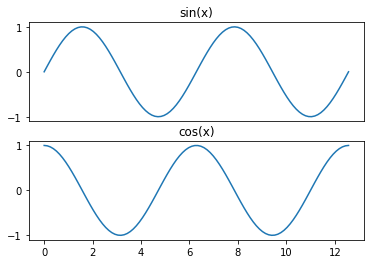

In [ ]:
x = np.linspace(0, np.pi*4, 100)
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[0].set_title("sin(x)")
axes[0].set_xticks([])
axes[1].plot(x, np.cos(x))
axes[1].set_title("cos(x)")
plt.show()

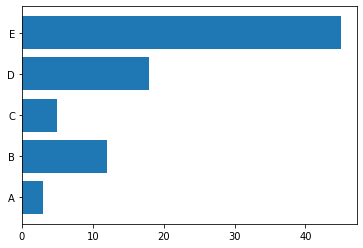

In [ ]:
# create dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
fig, ax = plt.subplots()
# Create horizontal bars
ax.barh(y_pos, height)
# Create names on the x-axis
ax.set_yticks(y_pos)
ax.set_yticklabels(bars)
# Show graphic
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
True
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


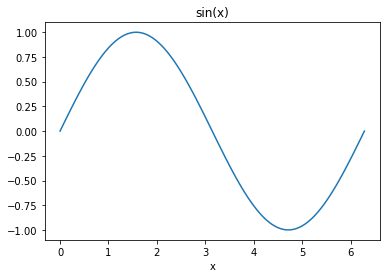

In [ ]:
# Step 1: create ndarrays
x = np.linspace(0, np.pi*2, 100)
sinx = np.sin(x)
print(type(x))
print(type(sinx))
print(x.size == sinx.size)
# Step 2: create figure/axes objects
fig = plt.figure()
ax = plt.axes()
#fig, ax = plt.subplots()
print(type(fig))
print(type(ax))
# Step 3: ax.method()
ax.plot(x, sinx)
# Step 4: ax.method()
ax.set_title("sin(x)")
ax.set_xlabel("x")
# Step 5: show/save
plt.show()
#fig.canvas.get_supported_filetypes()
#fig.savefig("xsinx.png")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22294 missing from current font.
  font.set_text

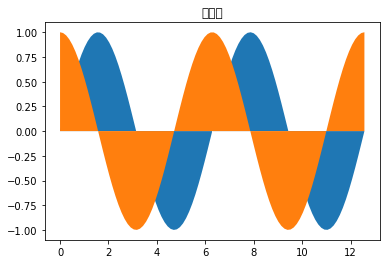

In [ ]:
# Step 1: create ndarrays
x = np.linspace(0, np.pi*4, 100)
sinx = np.sin(x)
cosx = np.cos(x)
# Step 2: create figure/axes objects
fig = plt.figure()
ax = plt.axes()
# Step 3: ax.method()
ax.fill_between(x, sinx)
ax.fill_between(x, cosx)
# Step 4: ax.method()
ax.set_title("區域圖")
# Step 5: show/save
fig.savefig("area_chart.jpg")

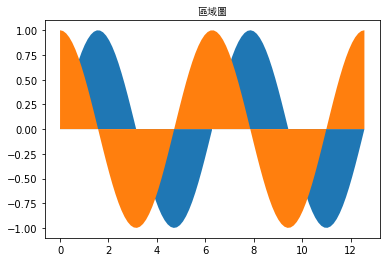

In [ ]:
# f_name = r"C:\Windows\Fonts\msjh.ttc"
# f_name = "/System/Library/Fonts/STHeiti Light.ttc"
my_font = mpl.font_manager.FontProperties(fname="STHeiti Light.ttc")
# Step 1: create ndarrays
x = np.linspace(0, np.pi*4, 100)
sinx = np.sin(x)
cosx = np.cos(x)
# Step 2: create figure/axes objects
fig = plt.figure()
ax = plt.axes()
# Step 3: ax.method()
ax.fill_between(x, sinx)
ax.fill_between(x, cosx)
# Step 4: ax.method()
ax.set_title("區域圖", font_properties=my_font)
# Step 5: show/save
fig.savefig("area_chart.jpg")

## 2022-07-12

講義連結：

- [探索性資料分析](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/03-exploration/lecture.slides.html)
- [資料科學模組 seaborn 入門](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/04-seaborn/lecture.slides.html)
- [Python 進階資料視覺化](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/05-advanced-visualizations/lecture.slides.html)

若想用 PDF 格式儲存，可以在網址後方加入 `?print-pdf` 就可以另存為 PDF 文件：

- [探索性資料分析](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/03-exploration/lecture.slides.html?print-pdf)
- [資料科學模組 seaborn 入門](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/04-seaborn/lecture.slides.html?print-pdf)
- [Python 進階資料視覺化](https://datainpoint.github.io/classroom-cht-python-for-data-visualization/05-advanced-visualizations/lecture.slides.html?print-pdf)（由於很多視覺化是呈現在網頁上，所以不建議以 PDF 格式瀏覽）

### 探索性資料分析

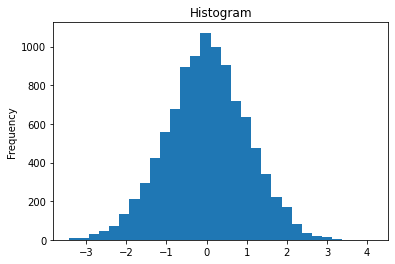

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: create dataset
normal_ndarray = np.random.normal(size=10000)
# Step 2: create fig/axes
fig = plt.figure()
ax = plt.axes()
# Step 3: AxesSubplot.method() -> main plot
ax.hist(normal_ndarray, bins=30)
# Step 4: AxesSubplot.method() -> add elements
ax.set_title("Histogram")
ax.set_ylabel("Frequency")
# Step 5: Show/save
plt.show()

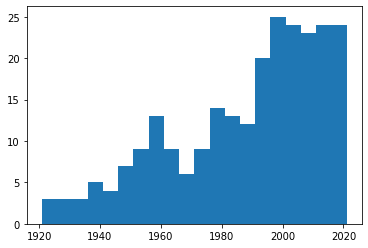

In [ ]:
import pandas as pd

# Step 1: import dataset
movies = pd.read_csv("https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/data/internet-movie-database/movies.csv")
release_years = movies["release_year"]
ratings = movies["rating"]
# Step 2: create fig/axes
fig = plt.figure()
ax = plt.axes()
# Step 3: AxesSubplot.method() -> main plot
ax.hist(release_years, bins=20)
# Step 5: Show/Save
plt.show()

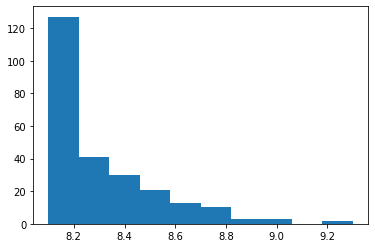

In [ ]:
fig = plt.figure()
ax = plt.axes()
# Step 3: AxesSubplot.method() -> main plot
ax.hist(ratings, bins=10)
# Step 5: Show/Save
plt.show()

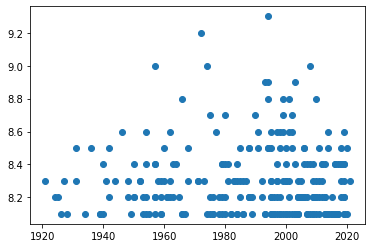

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(release_years, ratings)
plt.show()

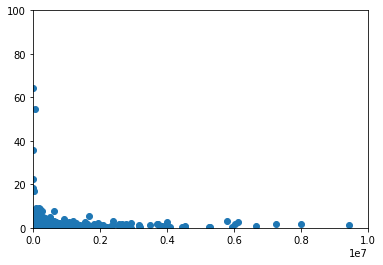

In [ ]:
daily_report = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-10-2022.csv")
confirmed = daily_report["Confirmed"]
incident_rate = daily_report["Incident_Rate"]
case_fatality_ratio = daily_report["Case_Fatality_Ratio"]
fig = plt.figure()
ax = plt.axes()
ax.scatter(confirmed, case_fatality_ratio)
ax.set_ylim(0, 100)
ax.set_xlim(0, 10000000)
plt.show()

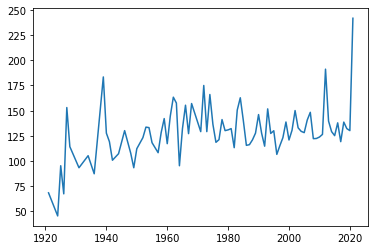

In [ ]:
mean_runtime_by_year = movies.groupby("release_year")["runtime"].mean()
x = mean_runtime_by_year.index
y = mean_runtime_by_year.values
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
plt.show()

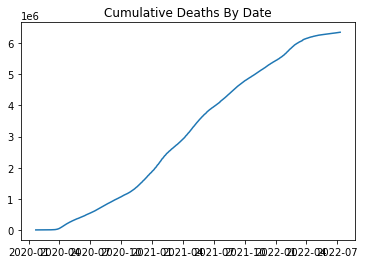

In [ ]:
time_series_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
time_series_deaths_long = pd.melt(time_series_deaths, id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                                  var_name="Date", value_name="Deaths")
time_series_deaths_long["Date"] = pd.to_datetime(time_series_deaths_long["Date"])
deaths_by_date = time_series_deaths_long.groupby("Date")["Deaths"].sum()
fig = plt.figure()
ax = plt.axes()
ax.plot(deaths_by_date.index, deaths_by_date.values)
ax.set_title("Cumulative Deaths By Date")
plt.show()

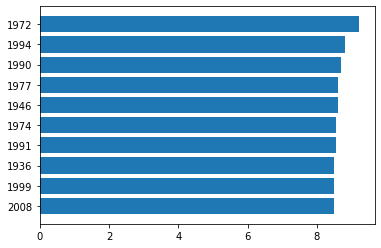

In [ ]:
rating_by_year = movies.groupby("release_year")["rating"].mean().sort_values()
top_ten = rating_by_year[-10:]
fig = plt.figure()
ax = plt.axes()
ax.barh(top_ten.index.astype(str), top_ten.values)
plt.show()

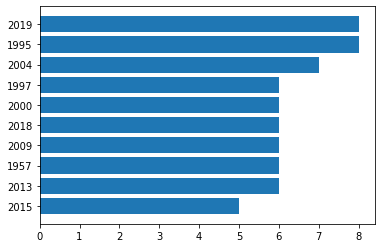

In [ ]:
count_by_year = movies["release_year"].value_counts()
top_ten = count_by_year[:10]
top_ten = top_ten.sort_values()
fig = plt.figure()
ax = plt.axes()
ax.barh(top_ten.index.astype(str), top_ten.values)
plt.show()

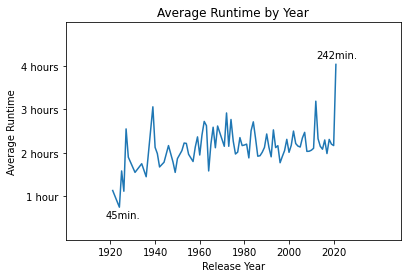

In [ ]:
mean_runtime_by_year = movies.groupby("release_year")["runtime"].mean()
x = mean_runtime_by_year.index
y = mean_runtime_by_year.values
runtime_max = mean_runtime_by_year.max()
runtime_min = mean_runtime_by_year.min()
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.set_title("Average Runtime by Year")
ax.set_ylabel("Average Runtime")
ax.set_xlabel("Release Year")
ax.set_xticks(np.arange(1920, 2030, 20))
ax.set_yticks(np.arange(60, 300, 60))
ax.set_yticklabels(["1 hour", "2 hours", "3 hours", "4 hours"])
ax.set_xlim(1900, 2050)
ax.set_ylim(0, 300)
ax.text(2012, 250, f"{runtime_max:.0f}min.")
ax.text(1918, 30, f"{runtime_min:.0f}min.")
plt.show()

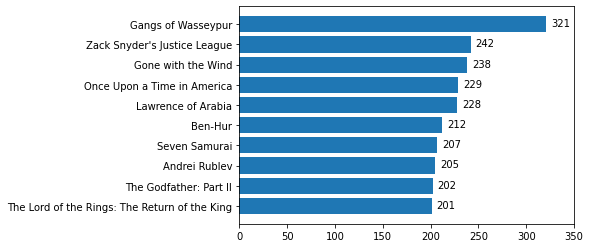

In [ ]:
titles = movies.sort_values("runtime")[-10:]["title"].values
runtimes = movies.sort_values("runtime")[-10:]["runtime"].values
fig = plt.figure()
ax = plt.axes()
ax.barh(titles, runtimes)
ax.set_xlim(0, 350)
for yy, xx in enumerate(runtimes):
    ax.text(xx + 5, yy - 0.1, f"{xx}")
plt.show()

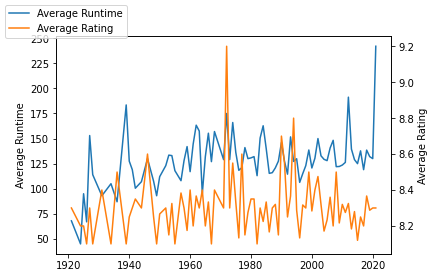

In [ ]:
average_runtime_by_year = movies.groupby("release_year")["runtime"].mean()
average_rating_by_year = movies.groupby("release_year")["rating"].mean()
fig = plt.figure()
ax1 = plt.axes()
ax1.plot(average_runtime_by_year.index, average_runtime_by_year.values, label="Average Runtime")
ax1.set_ylabel("Average Runtime")
ax2 = ax1.twinx()
ax2.plot(average_rating_by_year.index, average_rating_by_year.values, color="tab:orange", label="Average Rating")
ax2.set_ylabel("Average Rating")
fig.legend(loc="upper left")
plt.show()

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(2,)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


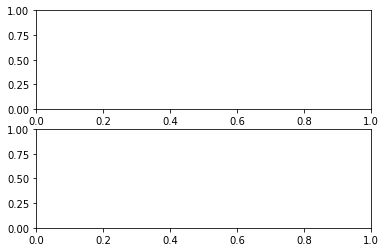

In [ ]:
fig, axes = plt.subplots(2, 1)
print(type(fig))
print(type(axes))
print(axes.shape)
print(type(axes[0]))
print(type(axes[1]))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(3,)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


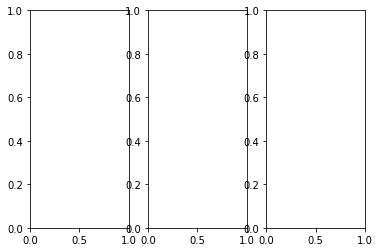

In [ ]:
fig, axes = plt.subplots(1, 3)
print(type(fig))
print(type(axes))
print(axes.shape)
print(type(axes[0]))
print(type(axes[1]))
print(type(axes[2]))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(2, 3)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


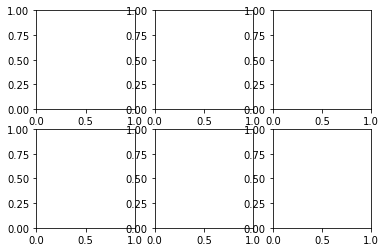

In [ ]:
fig, axes = plt.subplots(2, 3)
print(type(fig))
print(type(axes))
print(axes.shape)
print(type(axes[0, 0]))
print(type(axes[0, 1]))
print(type(axes[0, 2]))
print(type(axes[1, 0]))
print(type(axes[1, 1]))
print(type(axes[1, 2]))

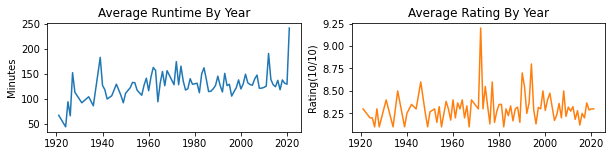

In [ ]:
average_runtime_by_year = movies.groupby("release_year")["runtime"].mean()
average_rating_by_year = movies.groupby("release_year")["rating"].mean()
fig, axes = plt.subplots(1, 2, figsize=(10, 2))
axes[0].plot(average_runtime_by_year.index, average_runtime_by_year.values, color="tab:blue")
axes[0].set_title("Average Runtime By Year")
axes[0].set_ylabel("Minutes")
axes[1].plot(average_rating_by_year.index, average_rating_by_year.values, color="tab:orange")
axes[1].set_title("Average Rating By Year")
axes[1].set_ylabel("Rating(10/10)")
plt.show()

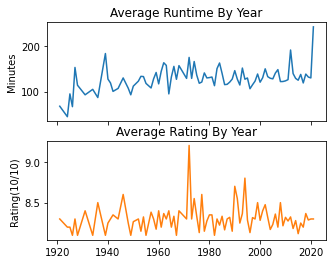

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(5, 4), sharex=True)
axes[0].plot(average_runtime_by_year.index, average_runtime_by_year.values, color="tab:blue")
axes[0].set_title("Average Runtime By Year")
axes[0].set_ylabel("Minutes")
axes[1].plot(average_rating_by_year.index, average_rating_by_year.values, color="tab:orange")
axes[1].set_title("Average Rating By Year")
axes[1].set_ylabel("Rating(10/10)")
plt.show()

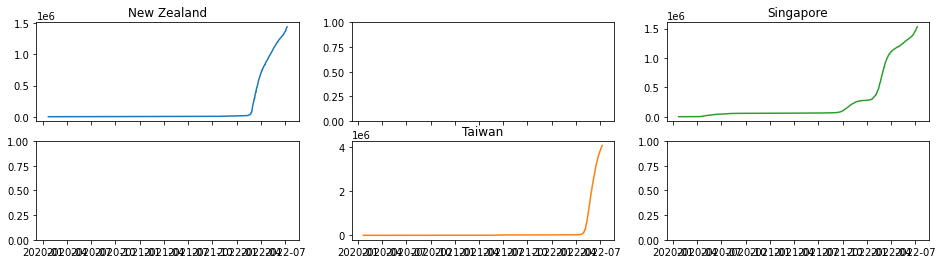

In [ ]:
time_series_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
time_series_confirmed_long = pd.melt(time_series_confirmed, id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                                    var_name="Date", value_name="Confirmed")
time_series_confirmed_long["Date"] = pd.to_datetime(time_series_confirmed_long["Date"])
confirmed_by_country_date = time_series_confirmed_long.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()
fig, axes = plt.subplots(2, 3, figsize=(16, 4), sharex=True)
nzl = confirmed_by_country_date[confirmed_by_country_date["Country/Region"] == "New Zealand"]
twn = confirmed_by_country_date[confirmed_by_country_date["Country/Region"] == "Taiwan*"]
sin = confirmed_by_country_date[confirmed_by_country_date["Country/Region"] == "Singapore"]
axes[0, 0].plot(nzl["Date"], nzl["Confirmed"])
axes[0, 0].set_title("New Zealand")
axes[1, 1].plot(twn["Date"], twn["Confirmed"], color="tab:orange")
axes[1, 1].set_title("Taiwan")
axes[0, 2].plot(sin["Date"], sin["Confirmed"], color="tab:green")
axes[0, 2].set_title("Singapore")
plt.show()

### 資料科學模組 seaborn 入門

In [ ]:
import seaborn as sns

print(sns.__version__)
print(sns.__file__)

0.11.2
/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py


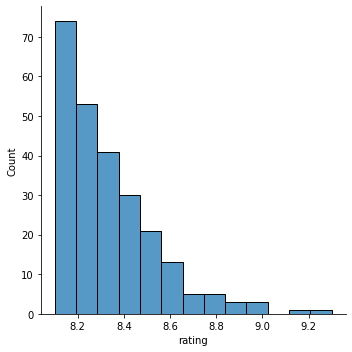

In [ ]:
ratings = movies["rating"]
sns.displot(ratings)
plt.show()

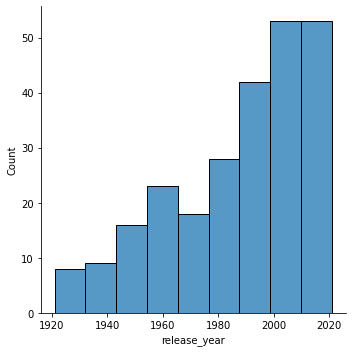

In [ ]:
release_years = movies["release_year"]
sns.displot(release_years)
plt.show()

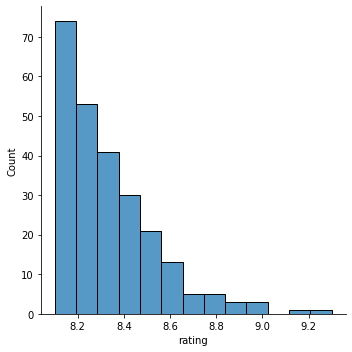

In [ ]:
sns.displot(data=movies, x="rating")
plt.show()

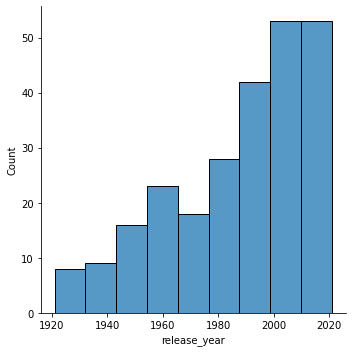

In [ ]:
sns_plot = sns.displot(data=movies, x="release_year")
fig = sns_plot.fig
fig.savefig("histogram.png")

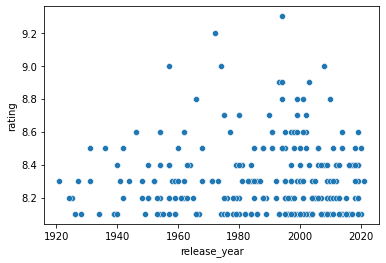

In [ ]:
#sns.scatterplot(x=movies["release_year"], y=movies["rating"])
sns.scatterplot(x="release_year", y="rating", data=movies)
plt.show()

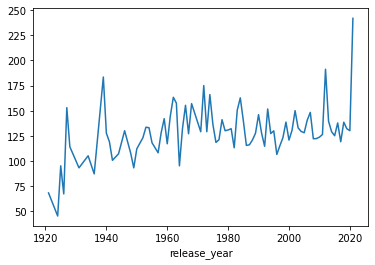

In [ ]:
sns.lineplot(x=average_runtime_by_year.index, y=average_runtime_by_year.values)
plt.show()

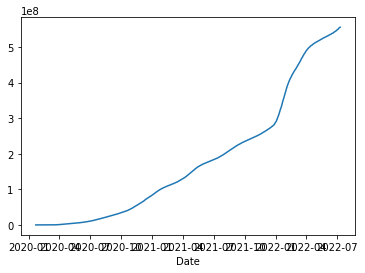

In [ ]:
sns.lineplot(x=confirmed_by_date.index, y=confirmed_by_date.values)
plt.show()

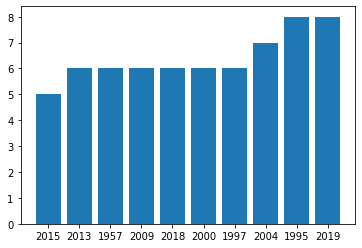

In [ ]:
fig, ax = plt.subplots()
ax.bar(top_ten.index.astype(str), top_ten.values)
plt.show()

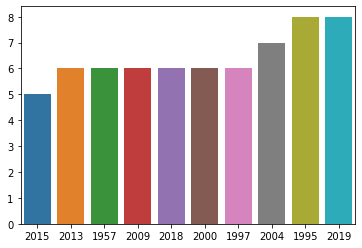

In [ ]:
sns.barplot(x=top_ten.index.astype(str), y=top_ten.values)
plt.show()

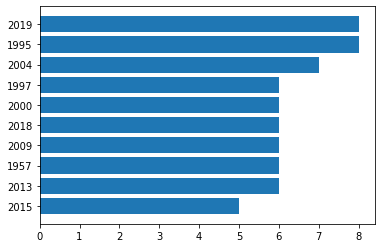

In [ ]:
fig, ax = plt.subplots()
ax.barh(top_ten.index.astype(str), top_ten.values)
plt.show()

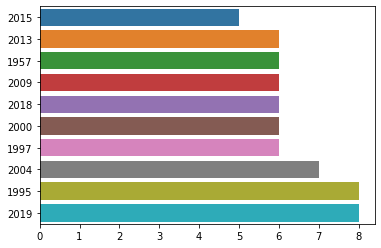

In [ ]:
sns.barplot(x=top_ten.values, y=top_ten.index.astype(str))
plt.show()

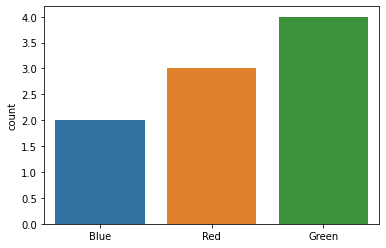

In [ ]:
colors = ["Blue", "Blue", "Red", "Red", "Red", "Green", "Green", "Green", "Green"]
# np.unique(colors, return_counts=True)
sns.countplot(x=colors)
plt.show()

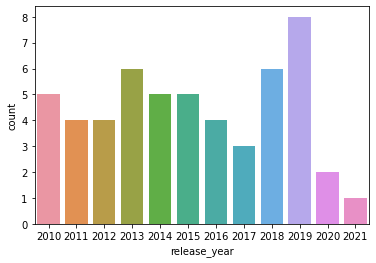

In [ ]:
sns.countplot(data=movies[movies["release_year"] >= 2010], x="release_year")
plt.show()

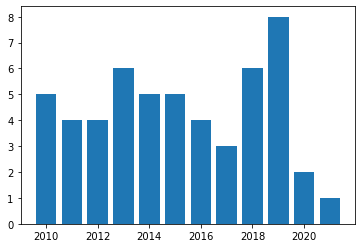

In [ ]:
counts_ser = movies[movies["release_year"] >= 2010]["release_year"].value_counts()
fig, ax = plt.subplots()
ax.bar(counts_ser.index, counts_ser.values)
plt.show()

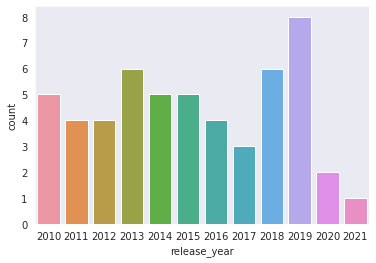

In [ ]:
sns.set_style("dark")
sns.countplot(data=movies[movies["release_year"] >= 2010], x="release_year")
plt.show()

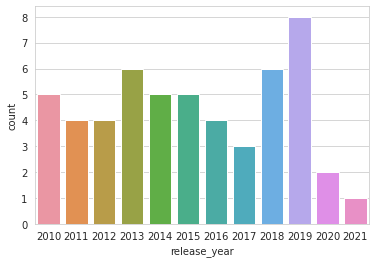

In [ ]:
sns.set_style("whitegrid")
sns.countplot(data=movies[movies["release_year"] >= 2010], x="release_year")
plt.show()

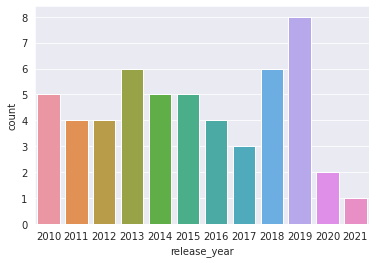

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data=movies[movies["release_year"] >= 2010], x="release_year")
plt.show()

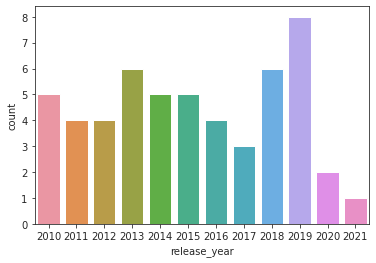

In [ ]:
sns.set_style("ticks")
sns.countplot(data=movies[movies["release_year"] >= 2010], x="release_year")
plt.show()

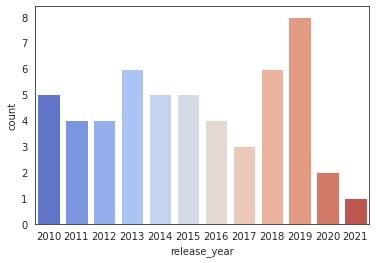

In [ ]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette(sns.color_palette("coolwarm", n_colors=12)) # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

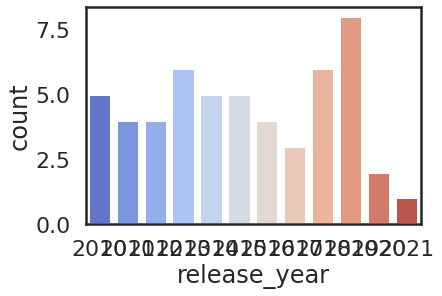

In [ ]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette(sns.color_palette("coolwarm", n_colors=12)) # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("poster")
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.show()

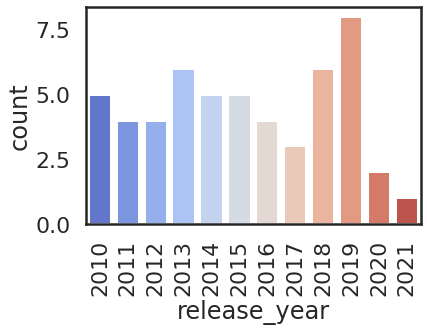

In [ ]:
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette(sns.color_palette("coolwarm", n_colors=12)) # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("poster")
sns.countplot(x="release_year", data=movies[movies["release_year"] >= 2010])
plt.xticks(rotation=90)
plt.show()

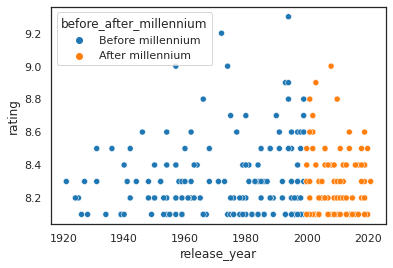

In [ ]:
before_after_millennium = movies["release_year"].map(lambda x: 'After millennium' if x >= 2000 else 'Before millennium')
movies = movies.assign(before_after_millennium = before_after_millennium)
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette("tab10") # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("notebook")
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies)
plt.show()

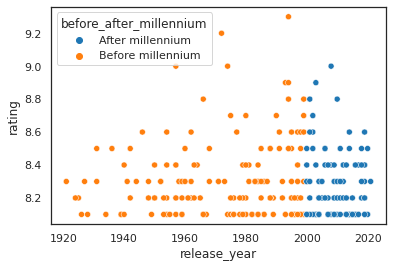

In [ ]:
before_after_millennium = movies["release_year"].map(lambda x: 'After millennium' if x >= 2000 else 'Before millennium')
movies = movies.assign(before_after_millennium = before_after_millennium)
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette("tab10") # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("notebook")
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies,
                hue_order=["After millennium", "Before millennium"])
plt.show()

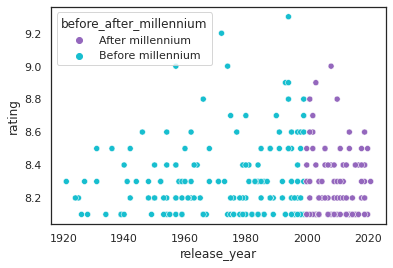

In [ ]:
hue_colors = {
    "Before millennium": "tab:cyan",
    "After millennium": "tab:purple"
}
sns.set_style("white") # "white","dark","whitegrid","darkgrid","ticks"
sns.set_palette("tab10") # https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_context("notebook")
sns.scatterplot(x="release_year", y="rating", hue="before_after_millennium", data=movies,
                hue_order=["After millennium", "Before millennium"],
                palette=hue_colors)
plt.show()

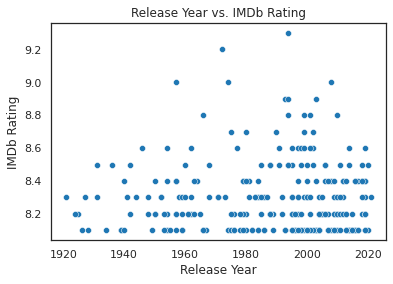

In [ ]:
g = sns.scatterplot(x="release_year", y="rating", data=movies)
g.set_title("Release Year vs. IMDb Rating")
g.set(xlabel="Release Year", ylabel="IMDb Rating")
plt.show()

In [ ]:
runtime_rating_by_years = movies.groupby("release_year")[["runtime", "rating"]].mean().reset_index()
runtime_rating_by_years

,release_year,runtime,rating
0,1921,68.0,8.300000
1,1924,45.0,8.200000
2,1925,95.0,8.200000
3,1926,67.0,8.100000
4,1927,153.0,8.300000
...,...,...,...
80,2017,119.0,8.200000
81,2018,138.5,8.366667
82,2019,132.0,8.287500
83,2020,130.0,8.300000


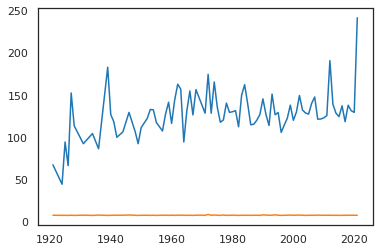

In [ ]:
fig, ax = plt.subplots()
ax.plot(runtime_rating_by_years["release_year"], runtime_rating_by_years["runtime"])
ax.plot(runtime_rating_by_years["release_year"], runtime_rating_by_years["rating"])
plt.show()

In [ ]:
runtime_rating_by_years_long = pd.melt(runtime_rating_by_years, id_vars="release_year",
                                       var_name="Variable", value_name="Value")
runtime_rating_by_years_long

,release_year,Variable,Value
0,1921,runtime,68.000000
1,1924,runtime,45.000000
2,1925,runtime,95.000000
3,1926,runtime,67.000000
4,1927,runtime,153.000000
...,...,...,...
165,2017,rating,8.200000
166,2018,rating,8.366667
167,2019,rating,8.287500
168,2020,rating,8.300000


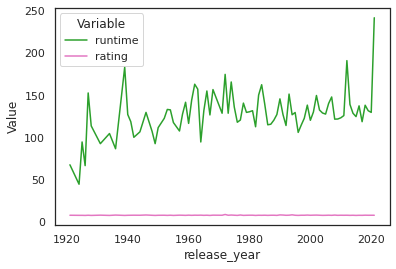

In [ ]:
hue_colors = {
    "runtime": "tab:green",
    "rating": "tab:pink"
}
sns.lineplot(data=runtime_rating_by_years_long, x="release_year", y="Value", hue="Variable",
             palette=hue_colors)
plt.show()

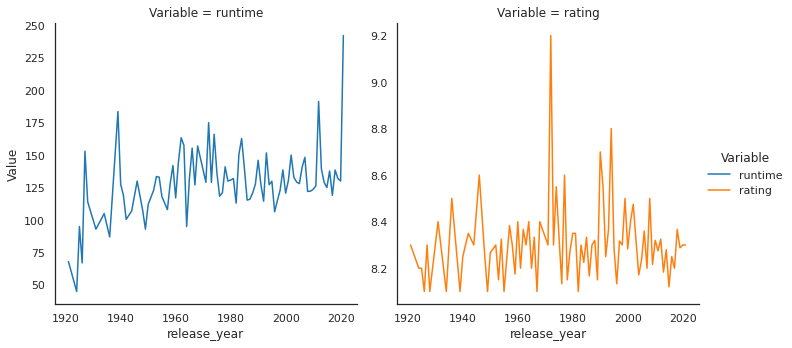

In [ ]:
sns.relplot(data=runtime_rating_by_years_long, x="release_year", y="Value", hue="Variable",
            kind="line", col="Variable", facet_kws={"sharey": False}) # col as in column
plt.show()

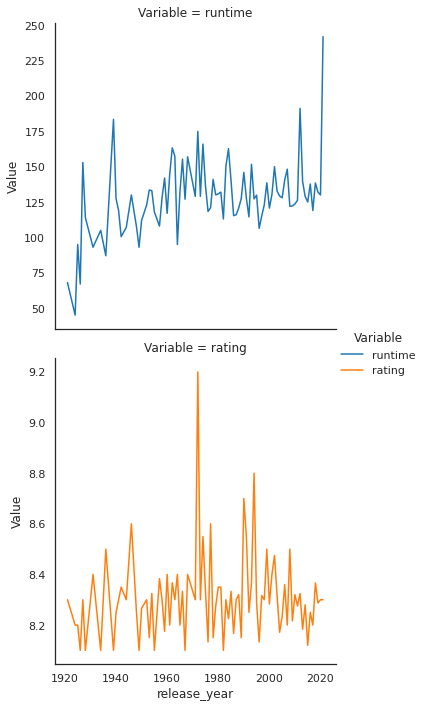

In [ ]:
sns.relplot(data=runtime_rating_by_years_long, x="release_year", y="Value", hue="Variable",
            kind="line", row="Variable", facet_kws={"sharey": False})
plt.show()

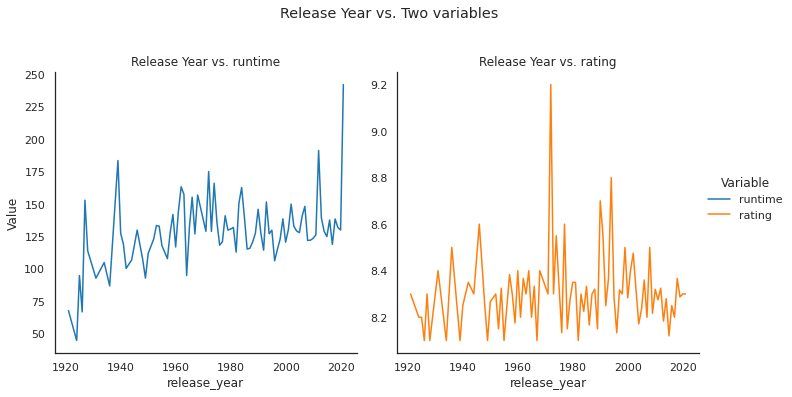

In [ ]:
g = sns.relplot(data=runtime_rating_by_years_long, x="release_year", y="Value", hue="Variable",
            kind="line", col="Variable", facet_kws={"sharey": False}) # col as in column
g.fig.suptitle("Release Year vs. Two variables", y=1.1)
g.set_titles("Release Year vs. {col_name}")
plt.show()

### Python 進階資料視覺化

`GeoPandas` 並不是 Google Colab 安裝好的預設模組，需要自行安裝。

```bash
pip install geopandas
```

In [ ]:
!pip install geopandas # ! 表示這個指令不是 Python 指令，是終端機、命令列指令

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 16.7 MB 306 kB/s 
     |████████████████████████████████| 6.3 MB 42.8 MB/s 


In [ ]:
import folium
import geopandas as gpd

In [ ]:
csv_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
df = pd.read_csv(csv_url)
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [ ]:
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df["Long_"], df["Lat"]))
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,geometry
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0,POINT (67.70995 33.93911)
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0,POINT (20.16830 41.15330)
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN,POINT (23.34700 -71.94990)
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0,POINT (1.65960 28.03390)
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0,POINT (1.52180 42.50630)


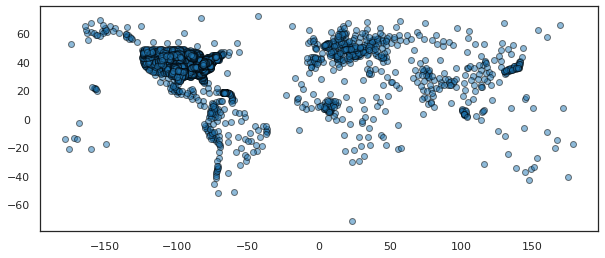

In [ ]:
ax = gdf.plot(figsize=(10, 5), alpha=0.5, edgecolor='black')
plt.show()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # natural earth low resolution
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
print(gpd.datasets.get_path('naturalearth_lowres'))

/usr/local/lib/python3.7/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp


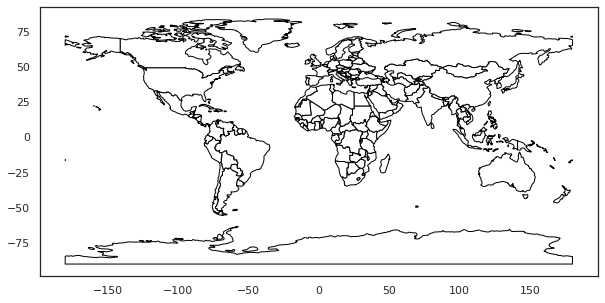

In [ ]:
ax = world.plot(figsize=(10, 5), color='white', edgecolor='black')
plt.show()

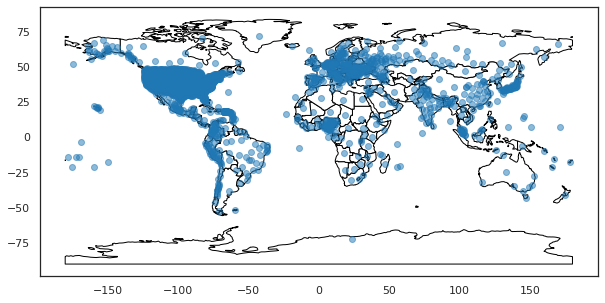

In [ ]:
ax = world.plot(figsize=(10, 5), color='white', edgecolor='black')
gdf.plot(ax=ax, color='tab:blue', alpha=0.5)
plt.show()

In [ ]:
world_countries = gpd.read_file("https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json")
print(type(world_countries))
world_countries.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


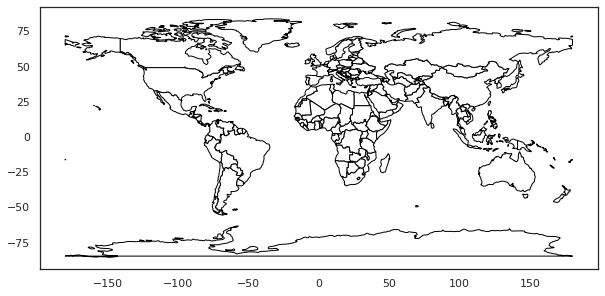

In [ ]:
world_countries.plot(figsize=(10, 5), color='white', edgecolor='black')
plt.show()

In [ ]:
daily_report = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-10-2022.csv")
lookup_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")
daily_report_lookup_table = pd.merge(daily_report[["Combined_Key", "Confirmed", "Deaths"]], lookup_table, on="Combined_Key")
daily_report_lookup_table.head()

,Combined_Key,Confirmed,Deaths,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Population
0,Afghanistan,183265,7728,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,38928341.0
1,Albania,287984,3514,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,2877800.0
2,Algeria,266257,6875,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,43851043.0
3,Andorra,44671,153,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,77265.0
4,Angola,101320,1900,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,32866268.0


In [ ]:
sum_by_country = daily_report_lookup_table.groupby("iso3")[["Confirmed", "Deaths", "Population"]].sum().reset_index()
incident_rate = sum_by_country["Confirmed"]*100000 / sum_by_country["Population"]
sum_by_country = sum_by_country.assign(incident_rate=incident_rate)
sum_by_country = sum_by_country[np.isfinite(sum_by_country["incident_rate"])]
gdf_choropleth = pd.merge(world_countries, sum_by_country, left_on="id", right_on="iso3") # GeoDataFrame + DataFrame
print(type(gdf_choropleth))
gdf_choropleth.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry,iso3,Confirmed,Deaths,Population,incident_rate
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",AFG,183265,7728,38928341.0,470.775264
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",AGO,101320,1900,32866268.0,308.279601
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",ALB,287984,3514,2877800.0,10007.088748
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,962937,2324,9890400.0,9736.077408
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",ARG,9426171,129145,45195777.0,20856.309208


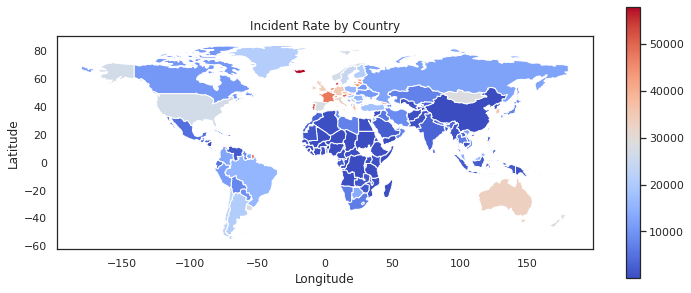

In [ ]:
ax = gdf_choropleth.plot(figsize=(12, 5), column="incident_rate", legend=True, cmap='coolwarm')
ax.set_title("Incident Rate by Country")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [ ]:
m = folium.Map(location = [25, 121.5], tiles = "OpenStreetMap", zoom_start = 3)
m

In [ ]:
m = folium.Map(location = [25, 121.5], tiles = "Stamen Terrain", zoom_start = 10)
m

In [ ]:
m = folium.Map(location = [25, 121.5], tiles = "Stamen Toner", zoom_start = 10)
m

In [ ]:
gdf_list = []
popup_list = []
for point, combined_key in zip(gdf["geometry"], gdf["Combined_Key"]):
    try:
        element = [point.xy[1][0], point.xy[0][0]]
        popup_list.append(combined_key)
        gdf_list.append(element)
    except:
        continue
m = folium.Map(location = [0, 0], tiles = "Stamen Terrain", zoom_start = 2)
for coordinates, combined_key in zip(gdf_list, popup_list):
    m.add_child(folium.Marker(location=coordinates,
                              popup=combined_key))

In [ ]:
#m

In [ ]:
from folium import plugins

m = folium.Map(location = [30, 15], tiles='Cartodb dark_matter', zoom_start=2)
plugins.HeatMap(gdf_list).add_to(m)

In [ ]:
m

In [ ]:
m = folium.Map(location=[30, 15], tiles="CartoDB positron", zoom_start=2)
folium.Choropleth(geo_data=gdf_choropleth,
                  name='geometry',
                  data=gdf_choropleth,
                  columns=['name', 'incident_rate'],
                  key_on='feature.properties.name',
                  fill_color='BuGn',
                  fill_opacity=0.75,
                  line_opacity=0.5,
                  legend_name='Incident Rate By Country').add_to(m)

In [ ]:
m

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(gdf_choropleth.sort_values("incident_rate", ascending=False).head(10),
             x="incident_rate", y="name", color="name")
fig.show()

In [ ]:
fig = px.scatter(gdf_choropleth, x="Confirmed", y="Deaths", color="name",
                 hover_data=['name', 'Confirmed', 'Deaths'])
fig.show()

In [ ]:
sum_by_combined_key = daily_report_lookup_table.groupby(["Combined_Key", "Lat", "Long_"])[["Confirmed", "Population"]].sum().reset_index()
incident_rate = sum_by_combined_key["Confirmed"]*100000 / sum_by_combined_key["Population"]
sum_by_combined_key = sum_by_combined_key.assign(incident_rate=incident_rate)
sum_by_combined_key = sum_by_combined_key[np.isfinite(sum_by_combined_key["incident_rate"])]

In [ ]:
fig = px.scatter_mapbox(sum_by_combined_key, lat="Lat", lon="Long_",
                        size="incident_rate", color="incident_rate",
                        size_max=50, mapbox_style="carto-positron", zoom=1, hover_name="Combined_Key")
fig.show()